In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as  plt

In [2]:
df=pd.read_csv('Documents/D3.csv')


In [3]:
df.head(100)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [4]:
dataset= df.values[:,:]
print('dataset=', dataset [:100,:])

dataset= [[ 0.          3.44        0.44        4.38754501]
 [ 0.04040404  0.1349495   0.88848485  2.6796499 ]
 [ 0.08080808  0.82989899  1.3369697   2.96848981]
 [ 0.12121212  1.52484848  1.78545454  3.25406475]
 [ 0.16161616  2.21979798  2.23393939  3.53637472]
 [ 0.2020202   2.91474747  2.68242424  3.81541972]
 [ 0.24242424  3.60969697  3.13090909  4.09119974]
 [ 0.28282828  0.30464646  3.57939394  2.36371479]
 [ 0.32323232  0.99959596  0.02787879  3.83296487]
 [ 0.36363636  1.69454546  0.47636364  4.09894997]
 [ 0.4040404   2.38949495  0.92484849  4.3616701 ]
 [ 0.44444444  3.08444444  1.37333333  4.62112526]
 [ 0.48484848  3.77939394  1.82181818  4.87731544]
 [ 0.52525252  0.47434343  2.27030303  3.13024065]
 [ 0.56565657  1.16929293  2.71878788  3.37990089]
 [ 0.60606061  1.86424242  3.16727273  3.62629616]
 [ 0.64646465  2.55919192  3.61575758  3.86942645]
 [ 0.68686869  3.25414141  0.06424242  5.30929177]
 [ 0.72727273  3.94909091  0.51272727  5.54589212]
 [ 0.76767677  0.64404

In [5]:
x2=df.values [:,1]
y=df.values[:,3]
m= len(y)

Text(0.5, 1.0, 'Scatter plot of training data')

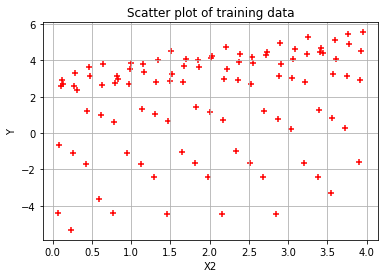

In [6]:
plt.scatter(x2,y, color='red', marker='+')
plt.grid()
plt.rcParams["figure.figsize"]= (6,6)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Scatter plot of training data')

In [7]:
x_2=x2.reshape(m,1)
print('x_2=', x_2[:5,:])

x_2= [[3.44      ]
 [0.1349495 ]
 [0.82989899]
 [1.52484848]
 [2.21979798]]


In [19]:
x_0=np.ones((m,1))
x_0[:5], len(x_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 100)

In [20]:
x=np.hstack((x_0, x_2))
x[:5]

array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [21]:
theta=np.zeros((2,1))
theta

array([[0.],
       [0.]])

In [22]:
def compute_loss(x,y, theta):
    
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J= 1 / (2 * m) * np.sum(sqrErrors) 
    
    return J

In [23]:
cost = compute_loss(x, y, theta)
print('The cost for given values of theta_0 and theta_1=', cost)

The cost for given values of theta_0 and theta_1= 552.4438459196241


In [24]:
def gradient_descent(x, y, theta, alpha, iterations):
    
    loss_history= np.zeros(iterations)
                    
    for i in range(iterations):
        predictions= x.dot(theta)
        errors=np.subtract(predictions, y)
        sum_delta=(alpha/ m)* x.transpose().dot(errors)
        theta= theta - sum_delta
        loss_history[i]= compute_loss(x,y,theta)
        
        
    return theta, loss_history

In [29]:
theta=[0,0]
iterations=2000;
alpha=0.001;

In [30]:
theta, loss_history= gradient_descent(x,y, theta, alpha, iterations)
print('Final value of theta=', theta)
print('cost_history=', loss_history)

Final value of theta= [0.44668898 0.67022989]
cost_history= [5.50118218 5.47821041 5.45551967 ... 3.61005789 3.61005315 3.61004841]


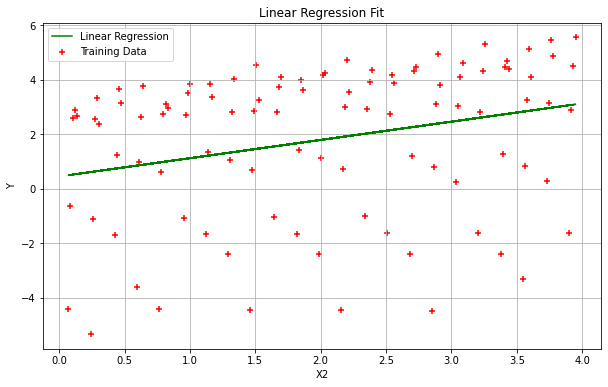

In [31]:
plt.scatter(x[:,1], y, color='red', marker='+', label= 'Training Data')
plt.plot(x[:,1],x.dot(theta), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

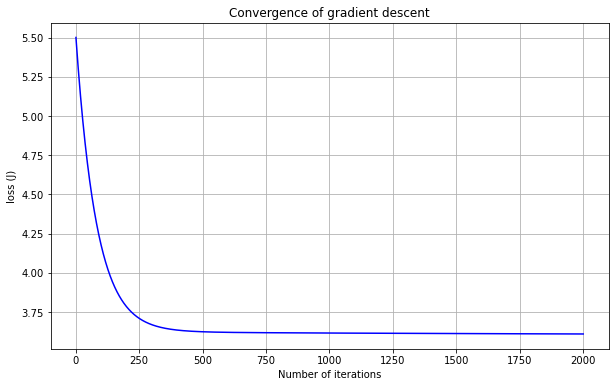

In [32]:
plt.plot(range(1, iterations +1), loss_history, color='blue')
plt.rcParams["figure.figsize"]= (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('loss (J)')
plt.title('Convergence of gradient descent')